In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
con_df=pd.read_csv("concrete.csv")

In [4]:
con_df.shape

(1030, 9)

In [5]:
con_df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
158,116.0,173.0,0.0,192.0,0.0,909.8,891.9,28,22.35
189,336.5,0.0,0.0,181.9,3.4,985.8,816.8,28,44.87
896,393.0,0.0,0.0,192.0,0.0,940.6,785.6,28,39.60
470,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,3,12.45
836,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,100,47.82
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
842,332.5,142.5,0.0,228.0,0.0,932.0,594.0,7,30.28
410,296.0,0.0,107.0,221.0,11.0,819.0,778.0,28,31.42
254,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,28,33.27
671,289.0,0.0,0.0,192.0,0.0,913.2,895.3,3,11.65


In [6]:
con_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
con_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
con_df.describe(include="all")

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
#duplicates?
duplicate=con_df.duplicated()
duplicate.sum()

25

In [15]:
con_df.drop_duplicates(inplace=True)
con_df.duplicated().sum()

0

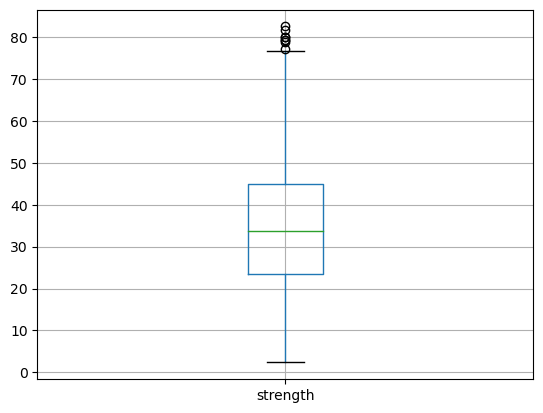

In [23]:
con_df.boxplot(column=["strength"])
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.755])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [26]:
low_strength,high_strength=remove_outlier(con_df["strength"])
con_df["strength"]=np.where(con_df["strength"]>high_strength,high_strength,con_df["strength"])
con_df["strength"]=np.where(con_df["strength"]<low_strength,low_strength,con_df["strength"])


<AxesSubplot:>

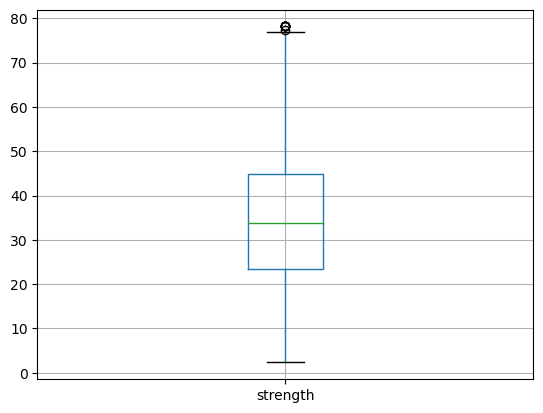

In [28]:
con_df.boxplot(column=["strength"])

In [27]:
con_df.shape

(1005, 9)

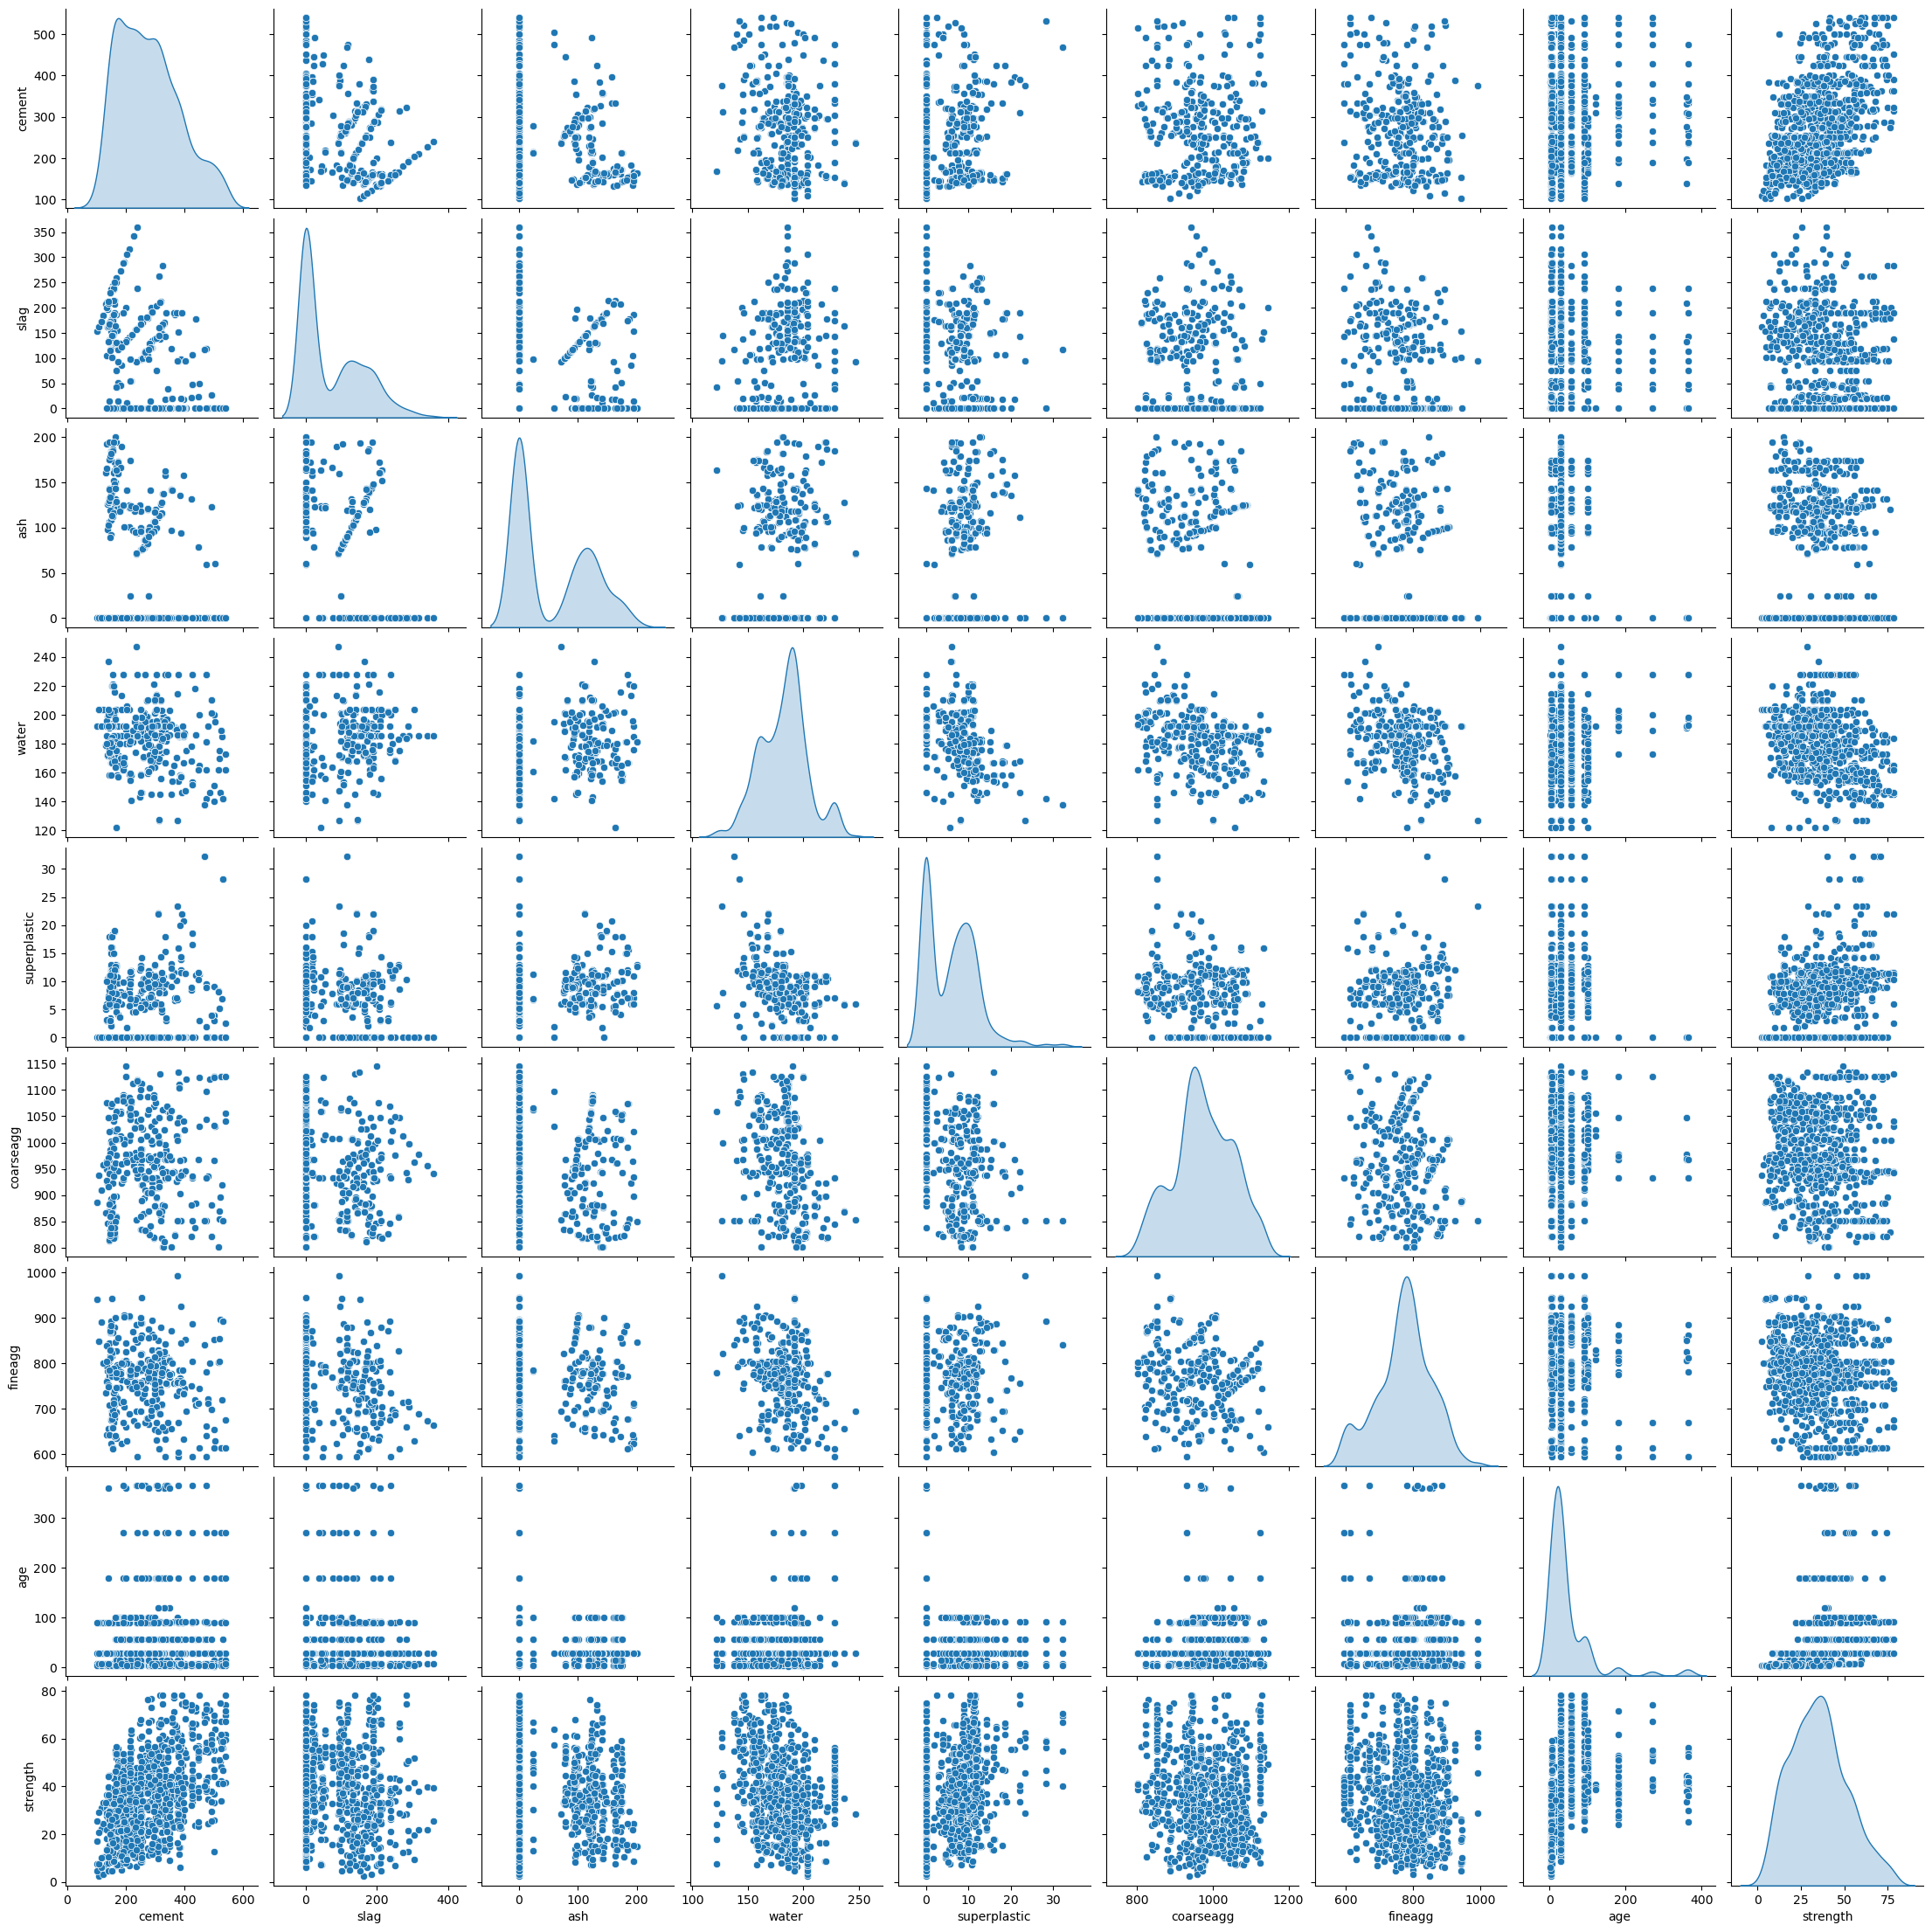

In [29]:
#BiVariate plots
sns.pairplot(con_df,diag_kind="kde")

In [18]:
#split data
#independent variables
x=con_df.drop(['strength'],axis=1)
#dependent variables
y=con_df[['strength']]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=1)

In [20]:
### Fit linear model
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [ ]:
here the coefficients for the each variable and the intercept

In [ ]:
The score (R^2) for in-sample and out of sample

In [21]:
model_1.score(x_train,y_train)

0.607714284088853

In [31]:
#out of sample score (R^2)

model_1.score(x_test,y_test)

0.45218892156739

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly=PolynomialFeatures(degree=3,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

poly_clf=linear_model.LinearRegression()

poly_clf.fit(x_train2,y_train)

#y_pred = poly_clf.predict(x_test2)

#print(y_pred)

#in sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2,y_train))

0.7994734496196264


In [33]:
# out off sample (testing) R^2 is our measure of success and does improve
print(poly_clf.score(x_test2,y_test))

0.7911247164157783
